In [1]:
import os
os.chdir("C:/Users/nipanda/Documents/Capstone Project1_Marketing Data/Capstone Project1_Marketing Data/Marketing_Campaign_P1")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use("classic")

## Reading ,merging  and understanding the required dataset

df1=pd.read_csv('Customer_and_bank details_p1.csv')
df2=pd.read_csv('Customer_campaign_details_p1.csv')
df3=pd.read_csv('Customer_Postal_Code_details.csv')
df4=pd.read_csv('Customer_Response_data_p1.csv')
df5=pd.read_csv('Customer_social_economic_data_p1.csv')
region=pd.read_csv("Region_code_master.csv")
city=pd.read_csv("City_Master.csv")
state=pd.read_csv("State_Master.csv")
df3=df3.rename({'customer_id':'Customer_id'},axis='columns')
df6=pd.merge(df1,df2, on='Customer_id', how='inner')
df7=pd.merge(df4,df5, on='Customer_id', how='inner')
df8=pd.merge(df6,df7, on='Customer_id', how='inner')
df=pd.merge(df8,df3,on='Customer_id' ,how='inner')
df=pd.merge(df,state,on='State_Code')
df=pd.merge(df,city,on='City_Code')
df=df.drop(['State_Code_y','Region_Code_y'],axis=1)
df=df.rename({'Region_Code_x':'Region_Code','State_Code_x':'State_Code','y':'Response_Target'},axis=1)
df1=pd.merge(state,region,on="Region_Code")
df=pd.merge(df,df1,on='State_Code')
df=df.drop(['State_Name_y','Region_Code_y'],axis=1)
df_data=df.drop(['Customer_id','Region_Code_x','State_Code','City_Code','Postal Code'],axis=1)
df_data['Response_Target']=df_data['Response_Target'].map(lambda x:1 if x=='yes' else 0)



In [2]:
def con(x):
    if x==999:
        return 'no'
    else:
        return 'yes'

df_data['pdays']=df_data['pdays'].map(con)

In [3]:
def get_duration(x):
    if 0<x<200:
        return 'LOW'
    elif 200<=x<700:
        return 'MEDIUM'
    else:
        return 'HIGH'
df_data['duration']=df_data.duration.map(get_duration)

In [4]:
age_median=df_data.age.median()
campaign_median=df_data.campaign.median()

df_data['age'].loc[(df_data['age']>df_data.age.quantile(0.99))]=age_median
df_data['campaign'].loc[(df_data['campaign']>df_data.campaign.quantile(0.99))]=campaign_median

In [5]:
df_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,Response_Target,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
2,32,admin.,single,university.degree,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
3,36,services,married,high.school,no,no,no,telephone,may,tue,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Kentucky,Henderson,South
4,31,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.856,5191.0,Kentucky,Henderson,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,37,housemaid,divorced,high.school,no,no,no,cellular,sep,wed,...,nonexistent,0,-3.4,92.379,-29.8,0.753,5017.5,North Dakota,Fargo,Central
37080,58,unknown,married,basic.4y,no,yes,no,telephone,may,wed,...,nonexistent,0,1.1,93.994,-36.4,4.857,5191.0,Wyoming,Cheyenne,West
37081,43,unemployed,divorced,basic.9y,no,no,no,cellular,jul,mon,...,nonexistent,0,1.4,93.918,-42.7,4.962,5228.1,Wyoming,Cheyenne,West
37082,37,admin.,single,high.school,no,no,no,cellular,apr,thu,...,failure,0,-1.8,93.075,-47.1,1.410,5099.1,Wyoming,Cheyenne,West


In [6]:
df=df_data.copy()

In [7]:
df.replace('unknown',np.NaN,inplace=True)
df.isnull().sum()

age                   0
job                 306
marital              72
education          1549
default            7700
housing             882
loan                882
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
Response_Target       0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
State_Name_x          0
City_Name             0
Region_Name           0
dtype: int64

In [8]:
df['default']= df['default'].fillna('unknown')
for col in df.columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
Response_Target    0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
State_Name_x       0
City_Name          0
Region_Name        0
dtype: int64

In [10]:

lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

university.degree      12520
middle.school          11260
high.school             8542
professional.course     4746
illiterate                16
Name: education, dtype: int64

In [11]:

month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(day_dict)

In [12]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)



In [13]:
df1=df.copy()


In [14]:
numerical=df1.select_dtypes(include='int64').columns
flt=df1.select_dtypes(include='float64').columns.to_list()
flt

numerical=numerical.drop(['month','day_of_week','Response_Target']).to_list()

numerical=np.concatenate([numerical,flt])

for num in numerical:
    df1[num]=(df1[num]-df1[num].mean())/df1[num].std()
    

In [15]:
cat=df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat:
    df[col]=le.fit_transform(df[col])


In [16]:
df1['month']=df1['month'].astype('object')
df1['day_of_week']=df1['day_of_week'].astype('object')

df2=df1.copy()

cat=df1.select_dtypes(include='object').columns
le=LabelEncoder()
for cgt in cat:
    df1[cgt]=le.fit_transform(df1[cgt])

df1.drop('Response_Target',axis=1,inplace=True)

In [17]:
df3=pd.get_dummies(df2.drop('City_Name',axis=1))
df3.drop('Response_Target',axis=1,inplace=True)

In [18]:
res=df.pop('Response_Target')

In [19]:
y=res

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(df)
Stand_df = sc.transform(df)
df_Scaled = pd.DataFrame(Stand_df,columns=df.columns)
df_Scaled.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,State_Name_x,City_Name,Region_Name
0,1.675998,0.947357,-0.281038,-1.549998,0.511654,-1.100664,2.360934,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
1,0.546807,0.947357,-0.281038,-0.226395,-1.953165,-1.100664,-0.423561,1.316968,-0.786267,-1.402824,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
2,-0.787691,-1.022702,1.378254,1.097209,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
3,-0.377076,0.947357,-0.281038,-1.549998,0.511654,-1.100664,-0.423561,1.316968,-0.786267,-0.694131,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.712439,0.331618,-0.470397,-0.619294,0.367676
4,-0.890344,-0.741265,-0.281038,-0.226395,0.511654,-1.100664,-0.423561,1.316968,-0.786267,0.014562,...,-0.34899,0.191987,0.648404,0.722446,0.888187,0.711862,0.331618,-0.470397,-0.619294,0.367676


### df_Scaled  is all scaled data
### df1 is numeric scaled data with labels
### df3 is numeric scaled with dummies

y is the target

In [47]:
import sklearn.model_selection as model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(df,y,test_size=0.2,random_state=200)

In [48]:
import sklearn.tree as tree
dtclf1=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
dtclf1.fit(x_train,y_train)
dtclf1.score(x_test,y_test)

0.9130376162869085

In [49]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test, dtclf1.predict_proba(x_test)[:,1])

0.8569747461560567

In [50]:
import pydotplus
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Users/nipanda/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'
os.chdir('C:/Users/nipanda/Documents/Capstone Project1_Marketing Data/Capstone Project1_Marketing Data/Marketing_Campaign_P1')

In [51]:
dot_data= tree.export_graphviz(dtclf1, feature_names=df.columns, class_names=["0","1"], filled=True, rounded=True, special_characters=True,
                              proportion=True,out_file=None)

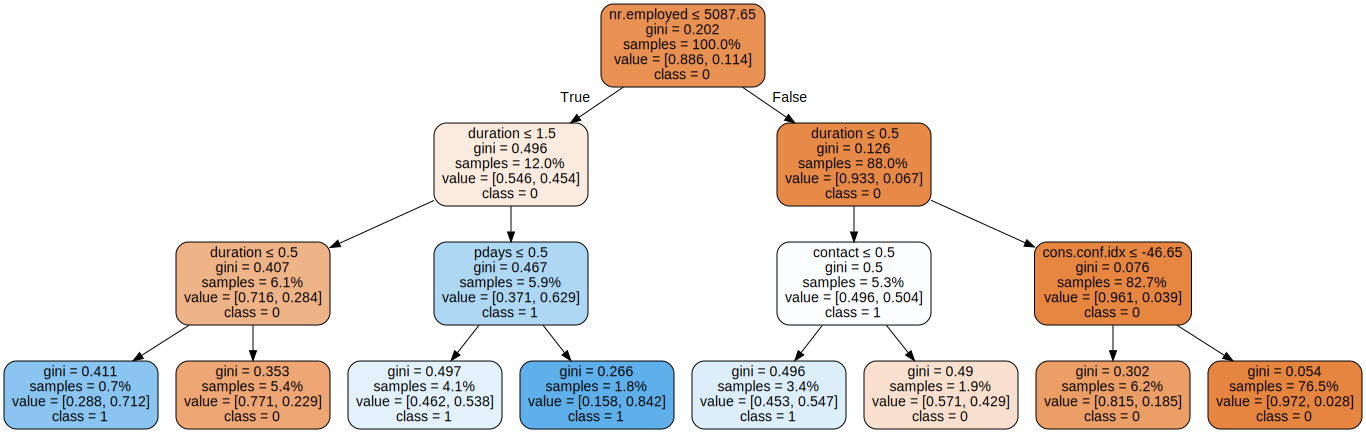

In [52]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [53]:
decisiontree=model_selection.GridSearchCV(dtclf1,param_grid={'max_depth':[2,3,4,5,6]})
decisiontree.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [54]:
decisiontree.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=200)

In [55]:
decisiontree.best_score_

0.9088211236006885

In [56]:
clf1=tree.DecisionTreeClassifier(max_depth=6,random_state=200)
clf1.fit(x_train,y_train)
clf1.score(x_test,y_test)

0.9093973304570581

In [57]:
metrics.roc_auc_score(y_test, clf1.predict_proba(x_test)[:,1])

0.9115106249060985

In [58]:
y_test

18349    0
10427    0
28723    0
35448    0
27163    0
        ..
14497    0
21400    0
19025    0
17374    0
31993    0
Name: Response_Target, Length: 7417, dtype: int64

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, decisiontree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6584
           1       0.63      0.46      0.53       833

    accuracy                           0.91      7417
   macro avg       0.78      0.71      0.74      7417
weighted avg       0.90      0.91      0.90      7417



In [55]:
!pip3 install imblearn


In [60]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
smt=SMOTE()
x1,y1=smt.fit_resample(x_train,y_train.ravel())
nms=NearMiss()
x2,y2=nms.fit_resample(x_train,y_train.ravel())

In [61]:
clfo=tree.DecisionTreeClassifier(max_depth=6,random_state=200)
clfo.fit(x2,y2)
clfo.score(x2,y2)

0.8866666666666667

In [62]:
metrics.roc_auc_score(y2, clfo.predict_proba(x2)[:,1])

0.9451678463648834

In [63]:
print(classification_report(y2, decisiontree.predict(x2)))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79      3375
           1       0.95      0.51      0.67      3375

    accuracy                           0.74      6750
   macro avg       0.81      0.74      0.73      6750
weighted avg       0.81      0.74      0.73      6750



In [64]:
x_train1,x_test1,y_train,y_test=model_selection.train_test_split(df3,y,test_size=0.2,random_state=200)

In [65]:
dtclf2=tree.DecisionTreeClassifier(max_depth=6,random_state=200)
dtclf2.fit(x_train1,y_train)
dtclf2.score(x_test1,y_test)

0.908183901847108

In [66]:
metrics.roc_auc_score(y_test, dtclf2.predict_proba(x_test1)[:,1])

0.9017332023939588

In [67]:
dot_data1= tree.export_graphviz(dtclf2, feature_names=df3.columns, class_names=["0","1"], filled=True, rounded=True, special_characters=True,
                              proportion=True,out_file=None)

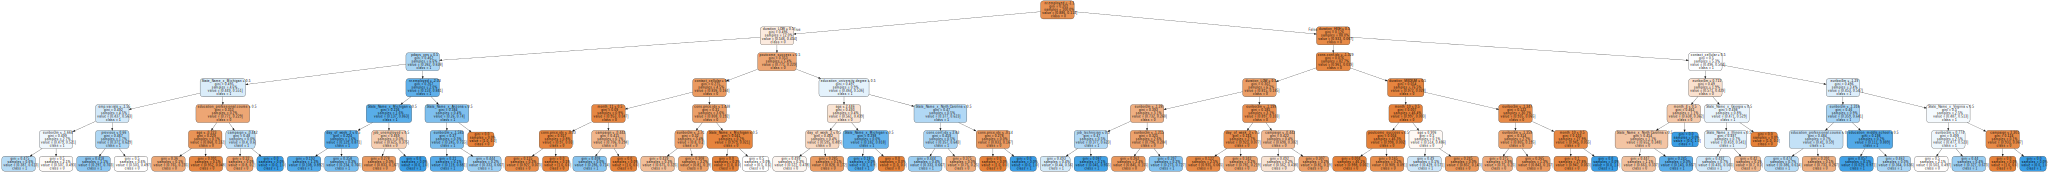

In [68]:
graph1 = graphviz.Source(dot_data1, format="png") 
graph1

In [69]:
decisiontree2=model_selection.GridSearchCV(clf2,param_grid={'max_depth':[2,3,4,5,6]})
decisiontree2.fit(x_train1,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [70]:
decisiontree2.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=200)

In [71]:
decisiontree2.best_score_

0.9100009822071667

In [72]:
print(classification_report(y_test, decisiontree2.predict(x_test1)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6584
           1       0.66      0.37      0.48       833

    accuracy                           0.91      7417
   macro avg       0.79      0.67      0.71      7417
weighted avg       0.90      0.91      0.90      7417

